In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.interpolate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import scipy.ndimage.filters as fi
from scipy.optimize import curve_fit
from sklearn.neighbors import NearestNeighbors
import gudhi
import os
import glob
from sklearn.decomposition import PCA
import matplotlib as mpl
from sklearn import preprocessing

In [2]:
def reorient(v):
    # shift spins by a constant so that they lie in [-pi,pi] with net magnetization at zero angle
    
    components = np.array([[np.cos(s), np.sin(s)] for s in v])
    [mx, my] = np.sum(components, axis=0)
    mAngle = np.arctan2(my, mx)
    newV = (v - mAngle + np.pi) % (2 * np.pi) - np.pi
    
    return newV

## Discrete Spins

Make an example spin configuration built from features (loops) of a very particular size. These are randomly placed, some overlapping, but there should nevertheless lead to a strong signal in the persistence image.

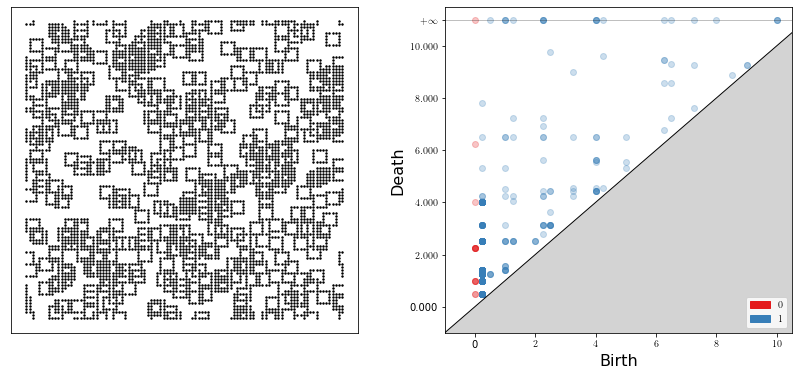

In [3]:
L = 100
size = 5
fractionFilled = 0.5

spins = np.zeros([L, L], dtype='int')

while(len(np.where(spins == 1)[0]) < fractionFilled * L**2):
    sitex, sitey = np.random.randint(0, L, 2)
    for i in range(size):
        spins[sitex % L, (sitey + i) % L] = 1
        spins[(sitex + size - 1) % L, (sitey + i) % L] = 1
        spins[(sitex + i) % L, sitey % L] = 1
        spins[(sitex + i) % L, (sitey + size - 1) % L] = 1

upspins = np.where(spins == 1)

alpha_complex = gudhi.AlphaComplex(np.transpose(upspins))
simplex_tree = alpha_complex.create_simplex_tree(max_alpha_square=10)
samplePD = simplex_tree.persistence()

fig, ax = plt.subplots(1, 2, figsize=(14,6))

ax[0].scatter(upspins[0], upspins[1], s=2, c='k')
ax[0].set_xticks([])
ax[0].set_yticks([])

gudhi.plot_persistence_diagram(samplePD, alpha=0.25, legend=True, axes=ax[1])
plt.title('')

plt.subplots_adjust(wspace=0.25)
plt.show()


## Continuous Spins

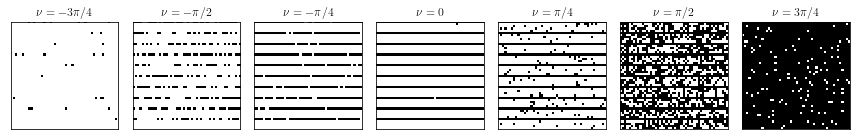

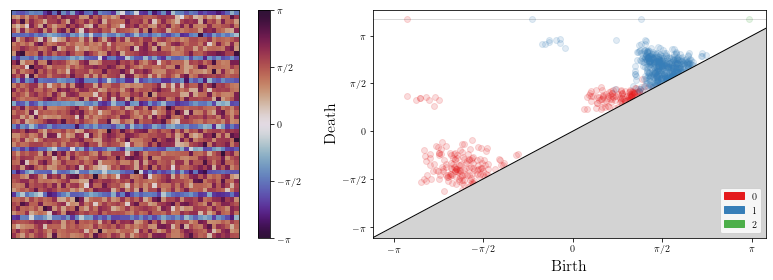

In [4]:
L = 50
spins = np.zeros([L, L])

spins += np.random.normal(np.pi/2, 0.5, [L, L])

for i in range(0, len(spins), 5):
    spins[i] -= np.pi * np.ones(L)

spins = spins.flatten()
spins = (spins + np.pi) % (2 * np.pi) - np.pi

spins = spins.reshape(L, L)

pcc = gudhi.PeriodicCubicalComplex(top_dimensional_cells = spins.flatten(), dimensions=[L,L], periodic_dimensions=[True,True])


nus = [-3*np.pi/4,-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4]
fig, axes = plt.subplots(1,len(nus), figsize=(12,4), sharex=True, sharey=True)
for i in range(len(nus)):
    axes[i].imshow(spins < nus[i], cmap='Greys')

axes[0].set_title(r'$\nu=-3\pi/4$')
axes[1].set_title(r'$\nu=-\pi/2$')
axes[2].set_title(r'$\nu=-\pi/4$')
axes[3].set_title(r'$\nu=0$')
axes[4].set_title(r'$\nu=\pi/4$')
axes[5].set_title(r'$\nu=\pi/2$')
axes[6].set_title(r'$\nu=3\pi/4$')  

plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()    




fig, axes = plt.subplots(1,2, figsize=(12,4))

config = axes[0].imshow(spins, cmap='twilight_shifted', vmin=-np.pi, vmax=np.pi)
cb = fig.colorbar(config, ax=axes[0])
cb.set_ticks(np.linspace(-np.pi, np.pi, 5))
cb.set_ticklabels(['$-\pi$', '$-\pi/2$', '$0$', '$\pi/2$', '$\pi$'])
axes[0].set_xticks([])
axes[0].set_yticks([])

gudhi.plot_persistence_diagram(pcc.persistence(), legend=True, alpha=0.15, axes=axes[1])
axes[1].set_title('')
axes[1].set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
axes[1].set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
axes[1].set_xticklabels(['$-\pi$', '$-\pi/2$', '$0$', '$\pi/2$', '$\pi$'])
axes[1].set_yticklabels(['$-\pi$', '$-\pi/2$', '$0$', '$\pi/2$', '$\pi$'])

plt.tight_layout()
plt.show()

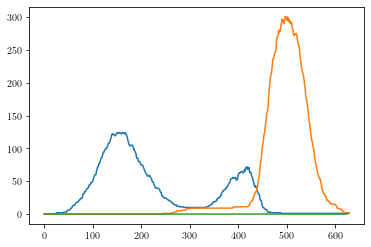

In [5]:
plt.plot([pcc.persistent_betti_numbers(x,x-0.01) for x in np.arange(-np.pi,np.pi,0.01)])

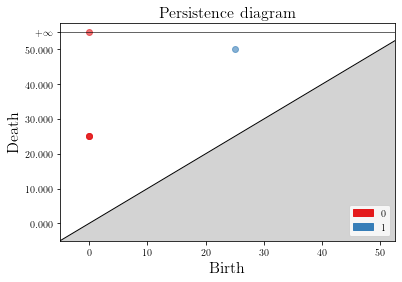

In [19]:
test = np.array([[0,0], [10,0], [0,10], [10,10]])

alpha_complex = gudhi.AlphaComplex(test)
simplex_tree = alpha_complex.create_simplex_tree()
samplePD = simplex_tree.persistence()

gudhi.plot_persistence_diagram(samplePD, legend=True)